In [1]:
import os
import cv2
import pandas as pd
import seaborn as sns
import numpy as np
import shutil
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#df_train = pd.read_csv(r"/content/drive/My Drive/Cleaned_Features.csv")
#df_test = pd.read_csv(r"/content/drive/My Drive/Cleaned_test_Features.csv")
#df_train = pd.DataFrame(df_train)
#df_test = pd.DataFrame(df_test)


In [13]:
df_train = pd.read_excel(r"/content/drive/My Drive/extracted feature sheets/Extracted_Features_train.xlsx")
df_test = pd.read_excel(r"/content/drive/My Drive/extracted feature sheets/Extracted_Features_test.xlsx")
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

In [14]:
df_train.head()


,Contrast,Energy,Homogeneity,Correlation,Dissimilarity,ASM,Entropy,Subtype,Image_Name,Shannon_Entropy,Fractal_Dimension
0,261.082742,0.014654,0.103927,0.883135,11.829791,0.000215,12.879239,Endometri,image_edo_0_3097.jpg,14.092138,1.878816
1,129.206502,0.024291,0.164012,0.906699,7.995975,0.000590,11.845309,Endometri,image_edo_0_2178.jpg,12.235772,1.852947
2,438.755216,0.036208,0.133857,0.917064,14.955695,0.001311,13.269874,Endometri,endo10.JPG,14.445177,1.833993
3,256.390103,0.014135,0.103701,0.883036,11.885496,0.000200,12.889959,Endometri,image_edo_0_2609.jpg,14.905214,1.853954
4,562.744602,0.010545,0.064645,0.808104,17.658940,0.000111,13.652711,Endometri,endo12.JPG,15.454333,1.869099


In [15]:
df_test.head()

,Contrast,Energy,Homogeneity,Correlation,Dissimilarity,ASM,Entropy,Subtype,Image_Name,Shannon_Entropy,Fractal_Dimension
0,354.541780,0.026833,0.141597,0.944028,12.687206,0.000720,12.872647,Endometri,endo8JPG.JPG,14.143645,1.742202
1,390.911519,0.012396,0.076806,0.836806,14.815680,0.000154,13.244677,Endometri,endo.JP7G.JPG,14.822747,1.882493
2,294.899323,0.014214,0.095067,0.839500,12.704437,0.000202,12.824422,Endometri,end3.JPG,14.302134,1.869746
3,115.927725,0.018204,0.143183,0.927751,7.929327,0.000331,12.097494,Endometri,image_edo_0_1756.jpg,14.272883,1.836745
4,64.924437,0.073520,0.287086,0.923036,5.249821,0.005405,10.140345,Endometri,image_edo_0_2234.jpg,10.007195,1.874242


In [11]:
# Create a new dataframe with only required features
df_train_input = df_train[[
    'Contrast', 'Energy', 'Homogeneity',
    'Correlation', 'Dissimilarity', 'Entropy',
    'Shannon_Entropy', 'Fractal_Dimension',
    'Subtype'
]]

print(f"Number of rows in training dataset: {df_train_input.shape[0]}")

df_test_input = df_test[[
    'Contrast', 'Energy', 'Homogeneity',
    'Correlation', 'Dissimilarity', 'Entropy',
    'Shannon_Entropy', 'Fractal_Dimension',
    'Subtype'
]]

print(f"Number of rows in testing dataset: {df_test_input.shape[0]}")

Number of rows in training dataset: 1416
Number of rows in testing dataset: 400



SVM Classification Report:
               precision    recall  f1-score   support

   Clear_Cell       0.37      0.37      0.37       100
    Endometri       0.52      0.67      0.59       100
     Mucinous       0.39      0.43      0.41       100
Non_Cancerous       0.31      0.31      0.31       100
       Serous       0.68      0.43      0.53       100

     accuracy                           0.44       500
    macro avg       0.46      0.44      0.44       500
 weighted avg       0.46      0.44      0.44       500

SVM Model Accuracy: 0.44


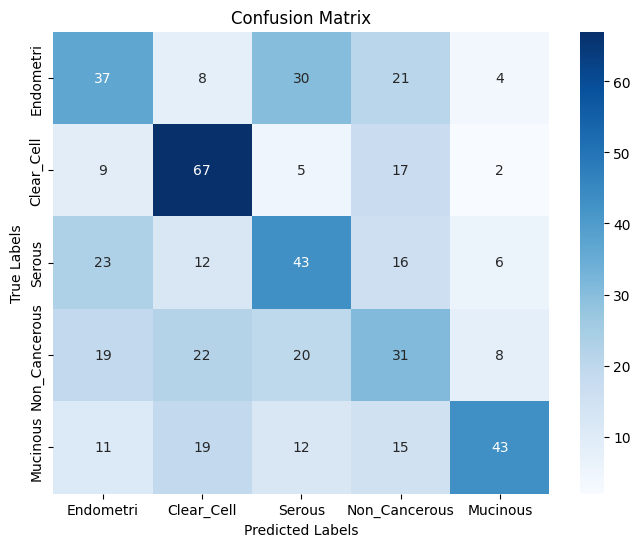

In [7]:
# Prepare features and labels for training data
X_train = df_train_input.drop(columns=['Subtype'])
y_train = df_train_input['Subtype']

# Train SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Prepare features and labels for separate test data
X_test = df_test_input.drop(columns=['Subtype'])
y_test = df_test_input['Subtype']

# Predictions
y_pred = svm_model.predict(X_test)

# Classification report
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()